In [524]:
import os
import pandas as pd
import json
import numpy as np
from IPython.display import Markdown, display
from os import path

## Quantitative Audio Data Analysis

In [525]:
def get_meta_info_for_date(PATH, DATE):
    
    extensions = ('.json')
    result = pd.DataFrame(columns = ['date'])

    for subdir, dirs, files in os.walk(PATH):
        for file in files:
            
            ext = os.path.splitext(file)[-1].lower()
            isCheckpointFile = "checkpoint" in file
            isTempfile = ".DS_Store" in file
            if ext in extensions and not isCheckpointFile and not isTempfile:
                curr = pd.json_normalize(json.load(open(PATH+file)))
                result = result.append(curr)
                
    # adding date column
    result['date'] = DATE
    
    # adding audio count column
    result['audio_count'] = np.nan
    result= result.reset_index()
    for index, row in result.iterrows(): 
        audioCount = 0 
        for audioFile in result['audioFiles'].values[index]:
            if (path.exists(PATH+audioFile)):
                audioCount = audioCount + 1
        result['audio_count'].values[index] = audioCount
        
    return result

In [526]:
def diplay_quantitative_report(webapp_meta):
    
    print ("Data received on Date:", date_received)
    
    print ("\nTotal Users: ", len(webapp_meta))
    EXPECT_AUDIO_SAMPLE_PER_USER = 3
    audio_complete_count = len(webapp_meta[webapp_meta['audio_count'] == EXPECT_AUDIO_SAMPLE_PER_USER])
    missing_audio_count = len(webapp_meta) - audio_complete_count
    print ("Count of Users with Missing Audio Samples: ", missing_audio_count)
    
    healthy_count = len(webapp_meta[webapp_meta['healthStatus'] == 'healthy'])
    suspect_count = len(webapp_meta[webapp_meta['healthStatus'] == 'suspect'])
    covid_count = len(webapp_meta[webapp_meta['healthStatus'] == 'covid'])
    print ("\nHealthy Count: ", healthy_count)
    print ("Suspect Count: ", suspect_count)
    print ("Covid Count: ", covid_count)
    
    print ("\nColumn Count Statistics")
    print (webapp_meta.count())
    
    print("\n", webapp_meta['gender'].hist(bins=2, color='green', grid = True, alpha = 0.5))
    print(webapp_meta['healthStatus'].hist(bins=3, color='blue', grid = True, alpha = 0.5))

In [527]:
def get_quantitative_analyse_data(path, date_received):
    # Analyse Data
    webapp_meta = get_meta_info_for_date(PATH = path + date_received + '/', DATE = date_received)
    # Print Quantitative Report
    diplay_quantitative_report(webapp_meta)
    # Save as CSV on local
    webapp_meta.to_csv(path + 'webapp_meta_' + date_received + '.csv', index=False)
    print ("Transofrmed Metadata saved on local as ", path + 'webapp_meta_' + date_received + '.csv')

### Analysis on Data from '2020-04-07'

Data received on Date: 2020-04-14

Total Users:  139
Count of Users with Missing Audio Samples:  11

Healthy Count:  120
Suspect Count:  18
Covid Count:  1

Column Count Statistics
index           139
date            139
id              139
age             139
gender          139
healthStatus    139
audioFiles      139
audio_count     139
dtype: int64

 AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Transofrmed Metadata saved on local as  data/web_app/webapp_meta_2020-04-07.csv


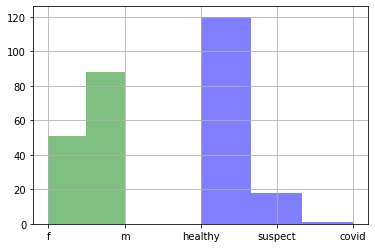

In [528]:
get_quantitative_analyse_data(path = 'data/web_app/',  date_received = '2020-04-07')

### Analysis on Data from '2020-04-10'

Data received on Date: 2020-04-14

Total Users:  146
Count of Users with Missing Audio Samples:  26

Healthy Count:  135
Suspect Count:  11
Covid Count:  0

Column Count Statistics
index           146
date            146
id              146
age             146
gender          146
healthStatus    146
audioFiles      146
audio_count     146
dtype: int64

 AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Transofrmed Metadata saved on local as  data/web_app/webapp_meta_2020-04-10.csv


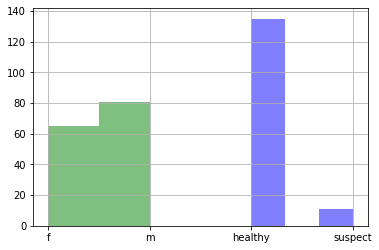

In [529]:
get_quantitative_analyse_data(path = 'data/web_app/',  date_received = '2020-04-10')

### Analysis on Data from '2020-04-14'

Data received on Date: 2020-04-14

Total Users:  122
Count of Users with Missing Audio Samples:  21

Healthy Count:  107
Suspect Count:  12
Covid Count:  1

Column Count Statistics
index                        122
date                         122
id                           122
age                          122
gender                       122
healthStatus                 122
audioFiles                   122
conditions.smoking            96
conditions.contact            96
symptoms.cough                96
symptoms.outOfBreath          96
conditions.diseases           30
symptoms.headache             14
symptoms.diarrhea              6
symptoms.fatigue              21
symptoms.fever                 3
symptoms.lossOfTasteSmell      2
audio_count                  122
dtype: int64

 AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Transofrmed Metadata saved on local as  data/web_app/webapp_meta_2020-04-14.csv


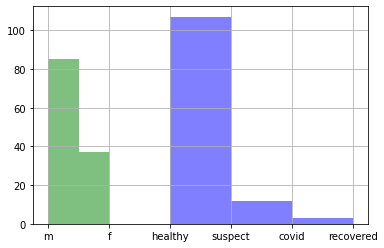

In [530]:
get_quantitative_analyse_data(path = 'data/web_app/',  date_received = '2020-04-14')

### Analysis on Data from '2020-04-26'

Data received on Date: 2020-04-14

Total Users:  189
Count of Users with Missing Audio Samples:  31

Healthy Count:  158
Suspect Count:  28
Covid Count:  2

Column Count Statistics
index                        189
date                         189
id                           189
age                          189
gender                       189
healthStatus                 189
audioFiles                   189
conditions.smoking           188
conditions.contact           188
symptoms.cough               188
symptoms.outOfBreath         188
conditions.diseases           37
symptoms.fever                10
symptoms.fatigue              36
symptoms.headache             27
symptoms.diarrhea             13
symptoms.lossOfTasteSmell     12
audio_count                  189
dtype: int64

 AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Transofrmed Metadata saved on local as  data/web_app/webapp_meta_2020-04-26.csv


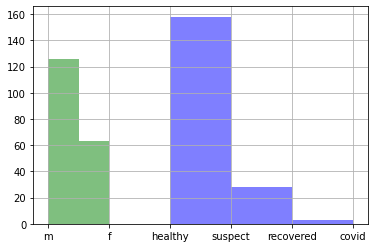

In [531]:
get_quantitative_analyse_data(path = 'data/web_app/',  date_received = '2020-04-26')

In [532]:
# The data received on '2020-04-03' has missing JSON files